<a href="https://colab.research.google.com/github/rickchoudhary115/ML_TRAIN/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
df=pd.read_csv('Position_Salaries.csv')
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values


In [18]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [19]:
from sklearn.preprocessing  import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [20]:
from sklearn.svm import SVR
regressor =SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [21]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [22]:
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_y.inverse_transform(y)),0.1)
X_grid=X_grid.reshape(len(X_grid),1)

/tmp/ipython-input-264927725.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_y.inverse_transform(y)),0.1)


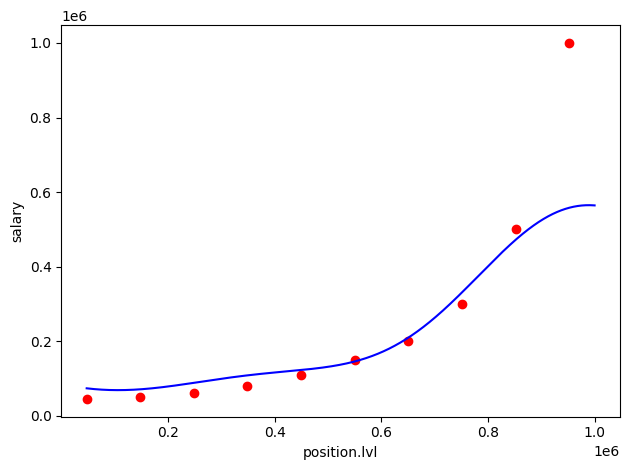

In [15]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.xlabel('position.lvl')
plt.ylabel('salary')
plt.tight_layout()
plt.show()